<a href="https://colab.research.google.com/github/Shraeyshth/Google-colab/blob/main/Copy_of_Anomaly_Detection_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a synthetic dataset
np.random.seed(42)

# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=(100, 2))

# Generate anomalous data
anomaly_data = np.random.uniform(low=-6, high=6, size=(10, 2))

# Combine the normal and anomalous data
data = np.vstack((normal_data, anomaly_data))

# Convert to a DataFrame for better visualization
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
print(df.head())

   Feature1  Feature2
0  0.496714 -0.138264
1  0.647689  1.523030
2 -0.234153 -0.234137
3  1.579213  0.767435
4 -0.469474  0.542560


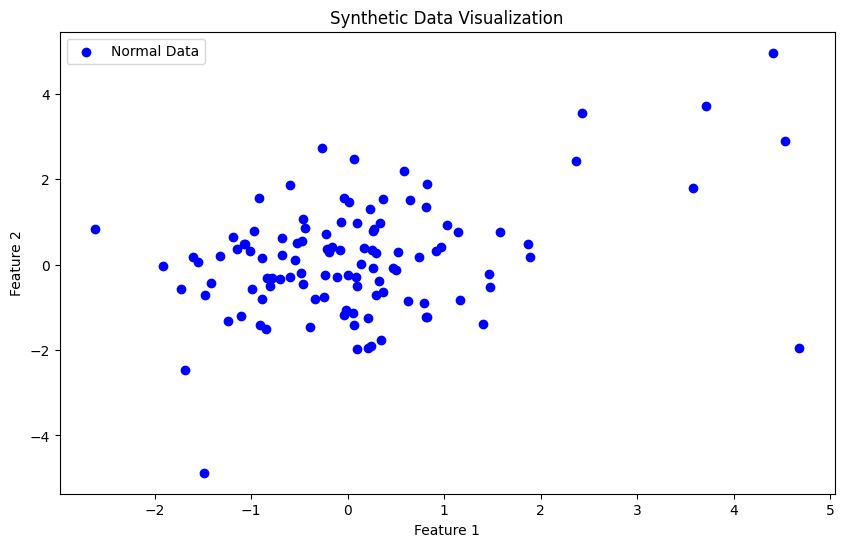

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature1'], df['Feature2'], color='blue', label='Normal Data')
plt.title('Synthetic Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
# Create the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
model.fit(data_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# Predict anomalies
predictions = model.predict(data_scaled)

# The model labels anomalies as -1 and normal points as 1
df['Anomaly'] = predictions

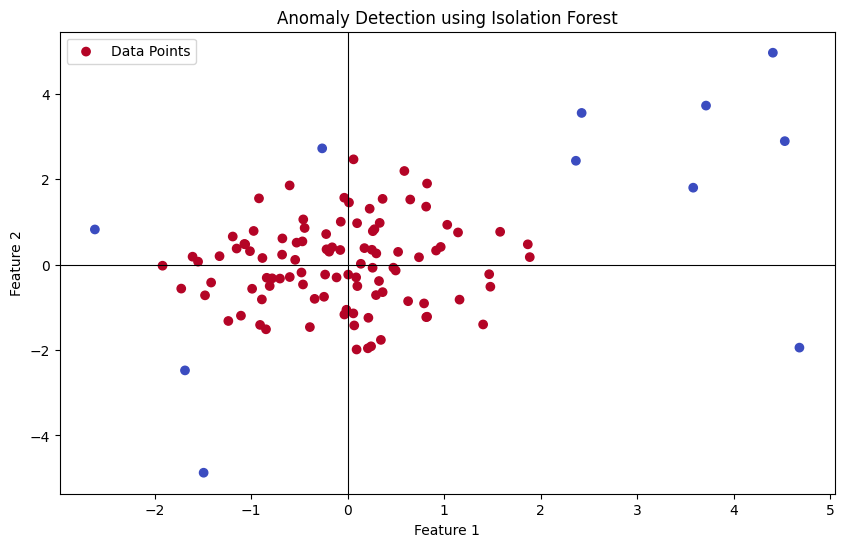

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Anomaly'], cmap='coolwarm', label='Data Points')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()